# PORTFOLIO OPTIMISATION 

**This project aims at a comparative study of various methods such as tradition/statistical, deep learning, reinforcement learning techniques to best optimise any given financial portfolio of stock assets. Thus maximising the returns whilst having minimum risk or volitility**

In [35]:
# import the necessary python libraries

import pandas as pd
import numpy as np
from datetime import datetime

# Visualisation Libraries
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


# Utility Scripts
from data_loader import get_closing_prices

**Obtaining the historical stock prices data for stocks in a portfolio**

In [36]:
# Tickers of the Stocks to examine within the portfolio
tickers = ['META','AMZN','AAPL', 'GOOG', 'NFLX', 'MSFT', 'TSLA']

# date range of the stocks
start_date = '2013-01-01'
todays_date = datetime.today().strftime('%Y-%m-%d')
# todays_date = '2020-03-16'
time_interval = 'daily'

# Create the data-source object and fetch the stocks data
df = get_closing_prices(tickers, start_date, todays_date, time_interval)

In [37]:
df.head()

META     AMZN       AAPL       GOOG       NFLX       MSFT  \
Date                                                                         
2013-01-02  28.000000  12.8655  19.608213  18.013729  13.144286  27.620001   
2013-01-03  27.770000  12.9240  19.360714  18.024191  13.798571  27.250000   
2013-01-04  28.760000  12.9575  18.821428  18.380356  13.711429  26.740000   
2013-01-07  29.420000  13.4230  18.710714  18.300158  14.171429  26.690001   
2013-01-08  29.059999  13.3190  18.761070  18.264042  13.880000  26.549999   

                TSLA  
Date                  
2013-01-02  2.357333  
2013-01-03  2.318000  
2013-01-04  2.293333  
2013-01-07  2.289333  
2013-01-08  2.245333

In [38]:
# initialising the weights of the assets in the portfolio 
# balanced weights (initiallialy all weighing the same)

weights = np.array([1/len(tickers) for t in tickers])
weights

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [39]:
# Visualising the Stocks Data
fig = go.Figure()

# Add traces for each stock
for column in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df[column], mode='lines', name=column))

# Add a title and labels
fig.update_layout(title='Historical Stock Prices',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Closing Price (USD)'))

# Display the plot
fig.show()

**Calculating the Daily Returns**

In [40]:
returns = df.pct_change()
returns

META      AMZN      AAPL      GOOG      NFLX      MSFT  \
Date                                                                     
2013-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-03 -0.008214  0.004547 -0.012622  0.000581  0.049777 -0.013396   
2013-01-04  0.035650  0.002592 -0.027855  0.019760 -0.006315 -0.018716   
2013-01-07  0.022949  0.035925 -0.005882 -0.004363  0.033549 -0.001870   
2013-01-08 -0.012237 -0.007748  0.002691 -0.001974 -0.020565 -0.005245   
...              ...       ...       ...       ...       ...       ...   
2023-06-23  0.013514 -0.006300 -0.001711 -0.006862  0.003645 -0.013806   
2023-06-26 -0.035535 -0.015464 -0.007553 -0.031946 -0.019056 -0.019163   
2023-06-27  0.030811  0.014529  0.015059 -0.000672  0.002741  0.018168   
2023-06-28 -0.006131 -0.001084  0.006328  0.017393  0.030594  0.003826   
2023-06-29 -0.013180 -0.008834  0.001797 -0.008837 -0.003722 -0.002382   

                TSLA  
Date                  
2013-01-02       NaN  
2013-01-03 -0.016685  
2013-01-04 -0.010642  
2013-01-07 -0.001744  
2013-01-08 -0.019220  
...              ...  
2023-06-23 -0.030271  
2023-06-26 -0.060600  
2023-06-27  0.038000  
2023-06-28  0.024100  
2023-06-29  0.004917  

[2641 rows x 7 columns]

In [41]:
# Create a figure
fig = go.Figure()

# Add traces for each stock
for column in returns.columns:
    fig.add_trace(go.Scatter(x=returns.index, y=returns[column], mode='lines', name=column))

# Add a title and labels
fig.update_layout(title='Daily Returns of the Portfolio',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Daily Returns'))

# Display the plot
fig.show()


**Displaying the annualised Covariance Matrix**

In [42]:
cov_matrix_annual = returns.cov() * 252 #where 252 is the number of business days
cov_matrix_annual

META      AMZN      AAPL      GOOG      NFLX      MSFT      TSLA
META  0.149847  0.069161  0.053588  0.063428  0.074419  0.053689  0.069939
AMZN  0.069161  0.107302  0.047644  0.056702  0.073904  0.053167  0.069861
AAPL  0.053588  0.047644  0.082775  0.044938  0.043574  0.048579  0.061572
GOOG  0.063428  0.056702  0.044938  0.075345  0.055849  0.051564  0.056132
NFLX  0.074419  0.073904  0.043574  0.055849  0.224046  0.050607  0.087547
MSFT  0.053689  0.053167  0.048579  0.051564  0.050607  0.073568  0.057598
TSLA  0.069939  0.069861  0.061572  0.056132  0.087547  0.057598  0.328376

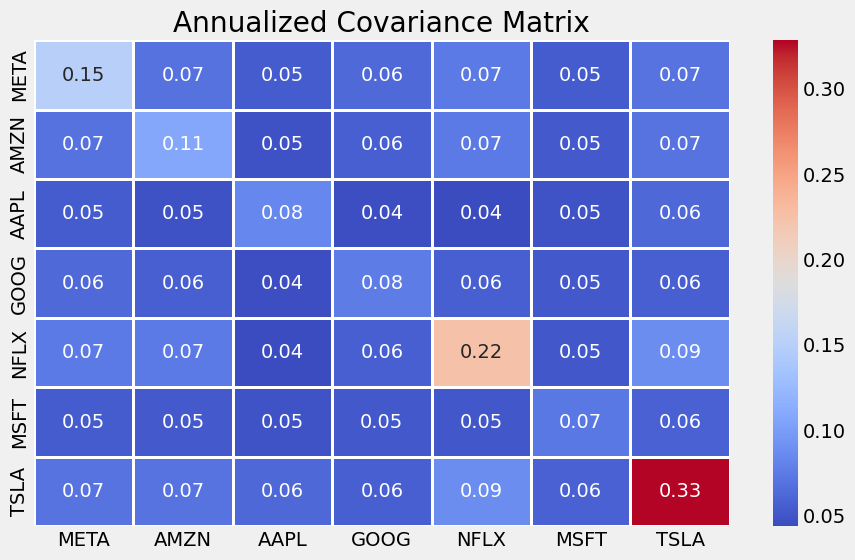

In [43]:
cov_matrix_annual = returns.cov() * 252

# Visualise the Annualised Covariance Matrix
plt.figure(figsize=(10, 6)) # You can adjust the size of your plot

# Creating the heatmap
sns.heatmap(cov_matrix_annual, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)

plt.title("Annualized Covariance Matrix")
plt.show()

**Calculating the Variance of the Portfolio**

![Formula for Variance of a Portfolio](https://i.stack.imgur.com/U4B9I.png)

In [44]:
# Calculating the variance of the Portfolio
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual,weights))
port_variance

0.07200366530933183

**Calculating the Volatility of the Portfolio**

It can be done by taking the square root of the portfolio variance

In [45]:
# Calculating the volatility (std dev of the porfolio)
port_volitility = np.sqrt(port_variance)
port_volitility

0.26833498711374154

**Calculating the Returns of the Portfolio**

![Formula for the returns of a portfolio](https://pressbooks.pub/app/uploads/sites/4438/2022/02/work-14.15.png)

In [46]:
# Calculating the annual portfolio return
port_simple_return = np.sum(returns.mean() * weights) * 252 # we multiply it with 252 (no. of working days in a year) to annualise the returns
port_simple_return

0.3393702803382876

**Displaying the Return, Volatility and Variance of the given Portfolio**

In [47]:
# Displaying the expected return, volatility and variance

print(f'Expected annual return: {port_simple_return*100 :.2f}%')
print(f'Annual volitility or risk: {port_volitility*100 :.2f}%')
print(f'Annual variance: {port_variance*100 :.2f}%')

Expected annual return: 33.94%
Annual volitility or risk: 26.83%
Annual variance: 7.20%


**Optimising the current porfolio for maximum Sharpe ratio**

In [48]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.cla import CLA

In [49]:
# Optimising the Portfolio

# Expected returns
mu = expected_returns.mean_historical_return(df)

# Annalised covariance matrix of asset returns
S = risk_models.sample_cov(df)

# optimising for the highest Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights  = ef.clean_weights() # performs rounding
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('META', 0.0), ('AMZN', 0.0), ('AAPL', 0.11981), ('GOOG', 0.0), ('NFLX', 0.19351), ('MSFT', 0.42199), ('TSLA', 0.26469)])
Expected annual return: 36.8%
Annual volatility: 29.4%
Sharpe Ratio: 1.18


(0.36843064809683457, 0.294317597422073, 1.1838593789455256)

**Visualising the Efficient Frontier**

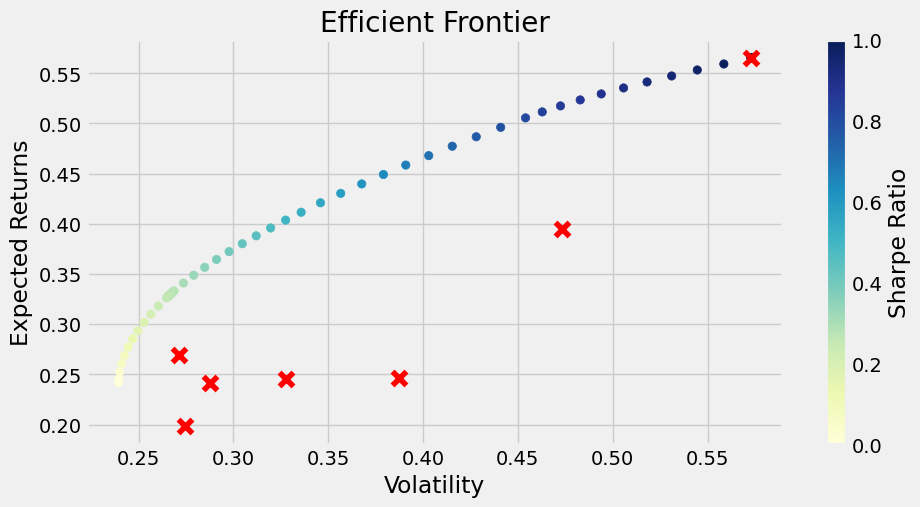

In [50]:
# Get the efficient frontier points
cla = CLA(mu, S)
(ret, vol, _) = cla.efficient_frontier()

# Plot the Efficient Frontier
plt.figure(figsize=(10, 5))
plt.scatter(vol, ret, c=(ret - min(ret))/(max(ret)-min(ret)), cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label='Sharpe Ratio')

# Optional: plot the individual assets
individual_vol = np.sqrt(np.diag(S))
individual_ret = mu.values
plt.scatter(individual_vol, individual_ret, marker='x', color='red', s=100)

# Show the plot
plt.show()

**Allocation of funcds to the various Assets**

In [51]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

total_val = 15000
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = total_val)

allocation, leftover = da.lp_portfolio()
print(f'Discrete allocation: {allocation}')
print(f'Remaining funds: ${leftover :.2f}')

Discrete allocation: {'AAPL': 9, 'NFLX': 7, 'MSFT': 19, 'TSLA': 15}
Remaining funds: $67.56


/home/drf20/miniconda3/envs/popt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1387: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.

